In [2]:
using Pkg
#Pkg.add("CSV")
#Pkg.add("DataFrames")
#Pkg.add("GLM")
#Pkg.add("Plots")
#Pkg.add("XLSX")
using CSV
using DataFrames
using GLM
using Plots
using XLSX

In [3]:
# Load the data
file_path = "01_Belgium_1.xlsx";
workbook = XLSX.openxlsx(file_path);
sheet = workbook["Лист1"];
xlsx_data = XLSX.gettable(sheet, first_row=1, infer_eltypes=true);
data = DataFrame(xlsx_data);  # Load the first table (assuming the data is in the first table)

# Rename columns to avoid issues with spaces and special characters
rename!(data, Dict(Symbol("Y (GDP)") => :Y_GDP));

# Extract the relevant columns and clean the data
data_clean = dropmissing(select(data, [:T, :Y_GDP]));

# Ensure the columns are of the correct type
data_clean.T = convert(Vector{Float64}, data_clean.T);
data_clean.Y_GDP = convert(Vector{Float64}, data_clean.Y_GDP);

# Non-linear transforms
data_clean.lnT=log.(data_clean.T);
data_clean.lnY=log.(data_clean.Y_GDP);
data_clean

Row,T,Y_GDP,lnT,lnY
,Float64,Float64,Float64,Float64
1,1.0,52684.8,0.0,10.8721
2,2.0,55264.1,0.693147,10.9199
3,3.0,53314.0,1.09861,10.884
4,4.0,56360.1,1.38629,10.9395
5,5.0,53529.7,1.60944,10.888
6,6.0,54844.7,1.79176,10.9123
7,7.0,53087.9,1.94591,10.8797
8,8.0,55798.2,2.07944,10.9295
9,9.0,53291.0,2.19722,10.8835


In [4]:
# Determine the size of the training set
train_size = 62;
train_data = data_clean[1:train_size, :];
test_data = data_clean[(train_size + 1):end, :];

In [5]:
# Fit the linear regression model
model = lm(@formula(Y_GDP ~ T), train_data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y_GDP ~ 1 + T

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  49087.3      667.634   73.52    <1e-59  47751.8    50422.8
T              638.601     18.4284  34.65    <1e-40    601.739    675.463
─────────────────────────────────────────────────────────────────────────

In [6]:
# Fit the log regression model
model_ln = lm(@formula(Y_GDP ~ lnT), train_data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y_GDP ~ 1 + lnT

Coefficients:
───────────────────────────────────────────────────────────────────────
               Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────
(Intercept)  34299.7    3017.01   11.37    <1e-15   28264.8     40334.6
lnT          10992.3     914.491  12.02    <1e-16    9163.08    12821.6
───────────────────────────────────────────────────────────────────────

In [7]:
# Fit the exponent regression model
model_exp = lm(@formula(lnY ~ T), train_data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

lnY ~ 1 + T

Coefficients:
──────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error        t  Pr(>|t|)    Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────────
(Intercept)  10.839       0.00864903   1253.21    <1e-99  10.8217      10.8563
T             0.00925403  0.000238736    38.76    <1e-43   0.00877649   0.00973157
──────────────────────────────────────────────────────────────────────────────────

In [8]:
# Fit the power regression model
model_pow = lm(@formula(lnY ~ lnT), train_data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

lnY ~ 1 + lnT

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  10.6132     0.0404551  262.35    <1e-92  10.5323    10.6941
lnT           0.162928   0.0122624   13.29    <1e-18   0.138399   0.187456
──────────────────────────────────────────────────────────────────────────

In [9]:
# Extract coefficients from non-linear model
coeff_ln = coef(model_ln);
coeff_exp = coef(model_exp);
coeff_pow = coef(model_pow);

# Predict on the train set
train_data_predictions = train_data;
train_data_predictions.predicted = predict(model, train_data);
train_data_predictions.predicted_ln = coeff_ln[1].+coeff_ln[2]*log.(train_data.T);
train_data_predictions.predicted_exp = exp.(coeff_exp[1].+coeff_exp[2].*(train_data.T));
train_data_predictions.predicted_pow = exp(coeff_pow[1]).*(train_data.T).^coeff_pow[2];

# Predict on the test set
test_data_predictions = test_data;
test_data_predictions.predicted = predict(model, test_data);
test_data_predictions.predicted_ln = coeff_ln[1].+coeff_ln[2]*log.(test_data.T);
test_data_predictions.predicted_exp = exp.(coeff_exp[1].+coeff_exp[2].*(test_data.T));
test_data_predictions.predicted_pow = exp(coeff_pow[1]).*(test_data.T).^coeff_pow[2];

In [10]:
# Function to calculate WAPE
function calculate_wape(actual, predicted)
    return round(sum(abs.(actual .- predicted)) / sum(abs.(actual)) * 100, digits=2)
end

# Calculate WAPE for the training period
wape_train = calculate_wape(train_data.Y_GDP, train_data_predictions.predicted);
wape_train_ln = calculate_wape(train_data.Y_GDP, train_data_predictions.predicted_ln);
wape_train_exp = calculate_wape(train_data.Y_GDP, train_data_predictions.predicted_exp);
wape_train_pow = calculate_wape(train_data.Y_GDP, train_data_predictions.predicted_pow);

# Calculate WAPE for the test period
wape_test = calculate_wape(test_data.Y_GDP, test_data_predictions.predicted);
wape_test_ln = calculate_wape(test_data.Y_GDP, test_data_predictions.predicted_ln);
wape_test_exp = calculate_wape(test_data.Y_GDP, test_data_predictions.predicted_exp);
wape_test_pow = calculate_wape(test_data.Y_GDP, test_data_predictions.predicted_pow);

# Print WAPE with two decimal places
println("WAPE for the training period: $wape_train%")
println("WAPE for the test period: $wape_test%")
println("WAPE (ln) for the training period: $wape_train_ln%")
println("WAPE (ln) for the test period: $wape_test_ln%")
println("WAPE (exp) for the training period: $wape_train_exp%")
println("WAPE (exp) for the test period: $wape_test_exp%")
println("WAPE (pow) for the training period: $wape_train_pow%")
println("WAPE (pow) for the test period: $wape_test_pow%")

WAPE for the training period: 3.04%
WAPE for the test period: 2.83%
WAPE (ln) for the training period: 7.82%
WAPE (ln) for the test period: 13.25%
WAPE (exp) for the training period: 2.81%
WAPE (exp) for the test period: 4.03%
WAPE (pow) for the training period: 7.0%
WAPE (pow) for the test period: 13.02%


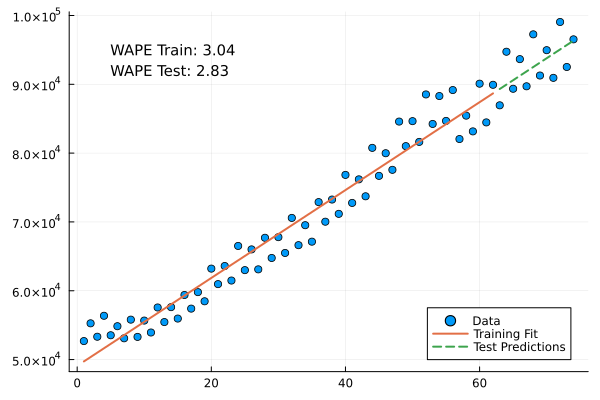

In [11]:
# Plot the results
scatter(data_clean.T, data_clean.Y_GDP, label="Data", legend=:bottomright)
plot!(train_data.T, train_data_predictions.predicted, label="Training Fit", lw=2)
plot!(test_data.T, test_data_predictions.predicted, label="Test Predictions", lw=2, linestyle=:dash)

# Annotate WAPE values
annotate!(5, 95000, text("WAPE Train: $wape_train", :left, 10, "black"))
annotate!(5, 92000, text("WAPE Test: $wape_test", :left, 10, "black"))


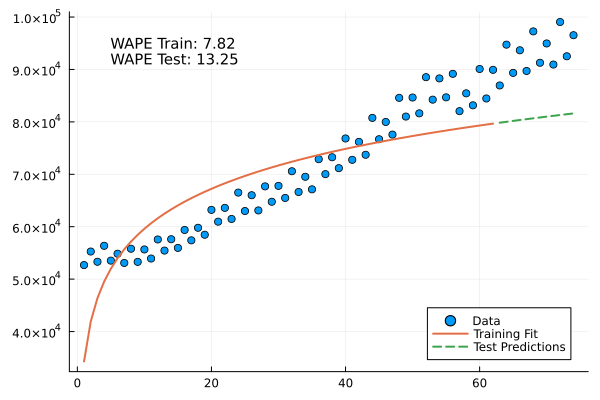

In [12]:
# Plot the results
scatter(data_clean.T, data_clean.Y_GDP, label="Data", legend=:bottomright)
plot!(train_data.T, train_data_predictions.predicted_ln, label="Training Fit", lw=2)
plot!(test_data.T, test_data_predictions.predicted_ln, label="Test Predictions", lw=2, linestyle=:dash)

# Annotate WAPE values
annotate!(5, 95000, text("WAPE Train: $wape_train_ln", :left, 10, "black"))
annotate!(5, 92000, text("WAPE Test: $wape_test_ln", :left, 10, "black"))

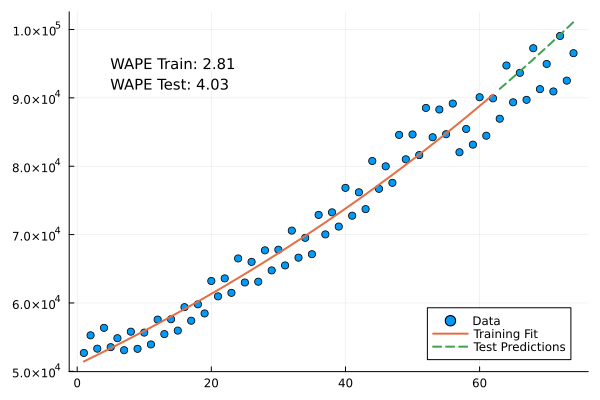

In [13]:
# Plot the results
scatter(data_clean.T, data_clean.Y_GDP, label="Data", legend=:bottomright)
plot!(train_data.T, train_data_predictions.predicted_exp, label="Training Fit", lw=2)
plot!(test_data.T, test_data_predictions.predicted_exp, label="Test Predictions", lw=2, linestyle=:dash)

# Annotate WAPE values
annotate!(5, 95000, text("WAPE Train: $wape_train_exp", :left, 10, "black"))
annotate!(5, 92000, text("WAPE Test: $wape_test_exp", :left, 10, "black"))

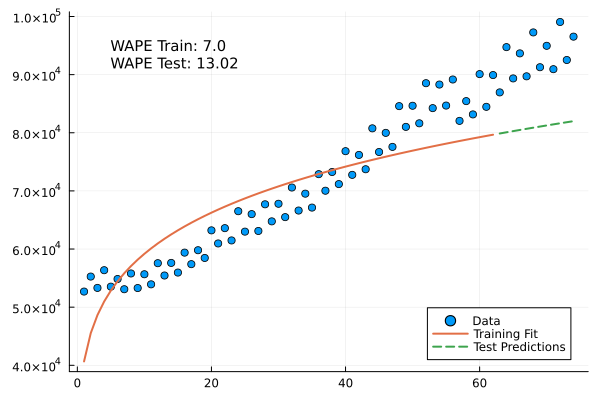

In [14]:
# Plot the results
scatter(data_clean.T, data_clean.Y_GDP, label="Data", legend=:bottomright)
plot!(train_data.T, train_data_predictions.predicted_pow, label="Training Fit", lw=2)
plot!(test_data.T, test_data_predictions.predicted_pow, label="Test Predictions", lw=2, linestyle=:dash)

# Annotate WAPE values
annotate!(5, 95000, text("WAPE Train: $wape_train_pow", :left, 10, "black"))
annotate!(5, 92000, text("WAPE Test: $wape_test_pow", :left, 10, "black"))